In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores/Stores.csv


In [144]:
import pandas as pd

**Perform EDA**

In [145]:
df=pd.read_csv("/kaggle/input/stores/Stores.csv")
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [146]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [147]:
df.shape

(896, 5)

In [148]:
df['Store_Sales'].idxmax()

649

In [149]:
#properties of this max index 
df.iloc[649]

Store ID                   650
Store_Area                1989
Items_Available           2414
Daily_Customer_Count       860
Store_Sales             116320
Name: 649, dtype: int64

In [150]:
df['Store_Sales'].idxmin()

31

In [151]:
#properties of this min index 
df.iloc[31]

Store ID                   32
Store_Area               1250
Items_Available          1508
Daily_Customer_Count      990
Store_Sales             14920
Name: 31, dtype: int64

In [152]:
df=df.drop('Store ID ',axis='columns')


In [153]:
df.duplicated().sum()

0

In [154]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [156]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [157]:
df.corr()['Store_Sales'].sort_values()
#we got a poor correlation 

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

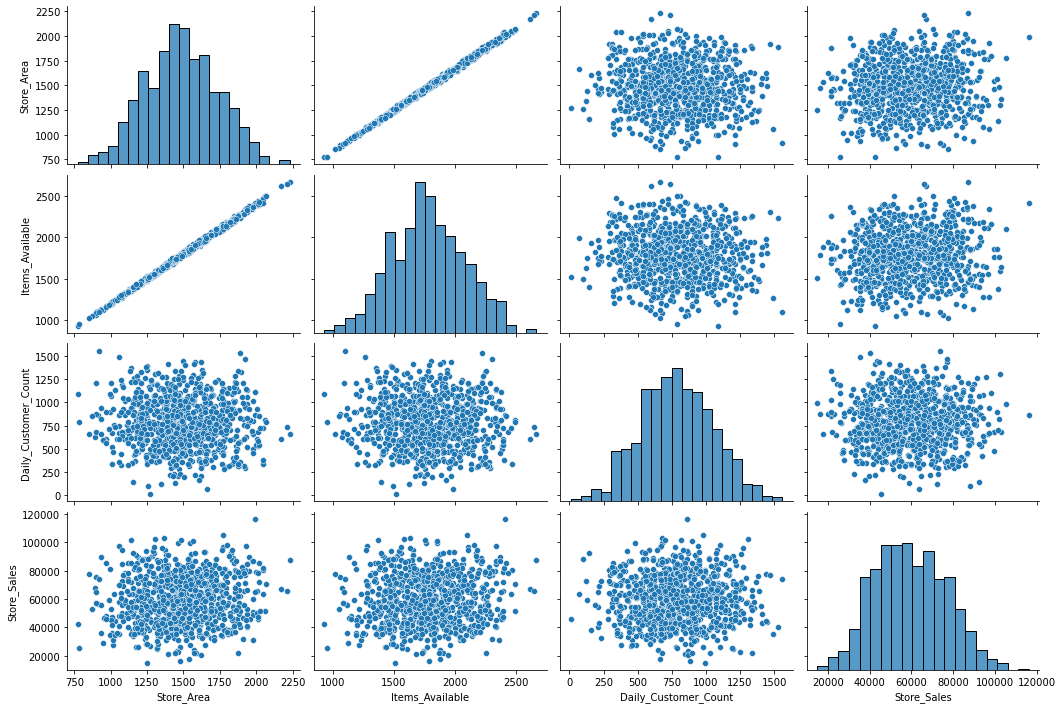

In [159]:
sns.pairplot(df,aspect=1.5)
plt.show()

<Figure size 1440x720 with 0 Axes>

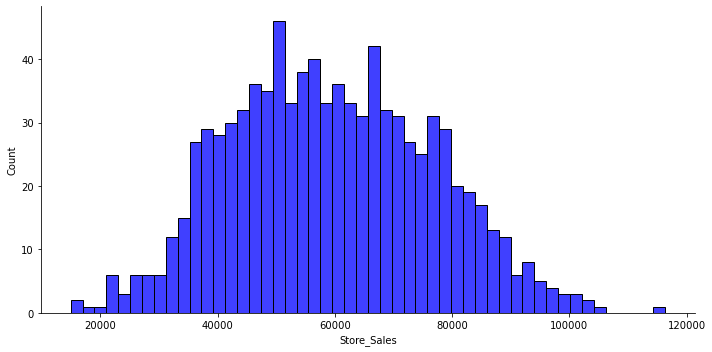

In [160]:
plt.figure(figsize=(20,10))
sns.displot(data=df,x='Store_Sales',bins=50,color='b',aspect=2)

**Feature Engineering**

In [161]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [162]:
import numpy as np

In [163]:
#Daily_Customer_Count 
IQRDaily_Customer_Count=970-600
upperlimit=970+1.5*IQRDaily_Customer_Count
lowerlimit=600-1.5*IQRDaily_Customer_Count
# if there's any outliers replaced with nan
df.iloc[df['Daily_Customer_Count']>upperlimit]=np.nan
df.iloc[df['Daily_Customer_Count']<lowerlimit]=np.nan


In [177]:
# drop outliers 
df.dropna(inplace=True)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659.0,1961.0,530.0,66490.0
1,1461.0,1752.0,210.0,39820.0
2,1340.0,1609.0,720.0,54010.0
3,1451.0,1748.0,620.0,53730.0
4,1770.0,2111.0,450.0,46620.0
...,...,...,...,...
891,1582.0,1910.0,1080.0,66390.0
892,1387.0,1663.0,850.0,82080.0
893,1200.0,1436.0,1060.0,76440.0
894,1299.0,1560.0,770.0,96610.0


In [178]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [180]:
X=df[['Store_Area','Items_Available','Daily_Customer_Count']]
y=df['Store_Sales']

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.fit_transform(X_test)


In [183]:
#Function that will return our regression result 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [184]:
def modelresults(predictions):
    print("Mean Absolute Error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Mean Squared Error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
    

In [185]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(X_train_Scaled,y_train)
predictionsLR=LR.predict(X_test_Scaled)
modelresults(predictionsLR)


Mean Absolute Error on model is 14349.998699736743
Mean Squared Error on model is 17337.59686115813


**we're getting bad results according to our bad correlations results**

In [186]:
# Check SVR 
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_Scaled,y_train)
predictions_Svr=svr.predict(X_test_Scaled)
modelresults(predictions_Svr)

Mean Absolute Error on model is 14433.737586533161
Mean Squared Error on model is 17436.674858511513


**Results are getting more bad check another algorithm**

In [188]:
from sklearn.model_selection import GridSearchCV
svrmodel= SVR()
param_gridSVR={'C':[0.001,0.01,0.1,0.5],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr=GridSearchCV(svrmodel,param_gridSVR)
gridsvr.fit(X_train_Scaled,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [189]:
print("Best paramters for model is {}".format(gridsvr.best_params_))

Best paramters for model is {'C': 0.5, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}


In [190]:
predgridsvr=gridsvr.predict(X_test_Scaled)
modelresults(predgridsvr)

Mean Absolute Error on model is 14337.852864100898
Mean Squared Error on model is 17335.780623165763
